(a) To begin, load in the Boston data set, which is part of the ISLP library.

In [2]:
!pip install ISLP

In [86]:
import ISLP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

In [72]:
boston = ISLP.load_data("Boston")

print(boston.head())
print(boston.tail())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741

(b) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [42]:
print(f"Rows = {boston.shape[0]}")
print(f"Columns = {boston.shape[1]}")
for i, col in enumerate(boston.columns):
    print(f"Column {i} : {col}")


Rows = 506
Columns = 13
Column 0 : crim
Column 1 : zn
Column 2 : indus
Column 3 : chas
Column 4 : nox
Column 5 : rm
Column 6 : age
Column 7 : dis
Column 8 : rad
Column 9 : tax
Column 10 : ptratio
Column 11 : lstat
Column 12 : medv


1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. LSTAT    % lower status of the population
13. MEDV     Median value of owner-occupied homes in $1000's

resource:https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

(c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

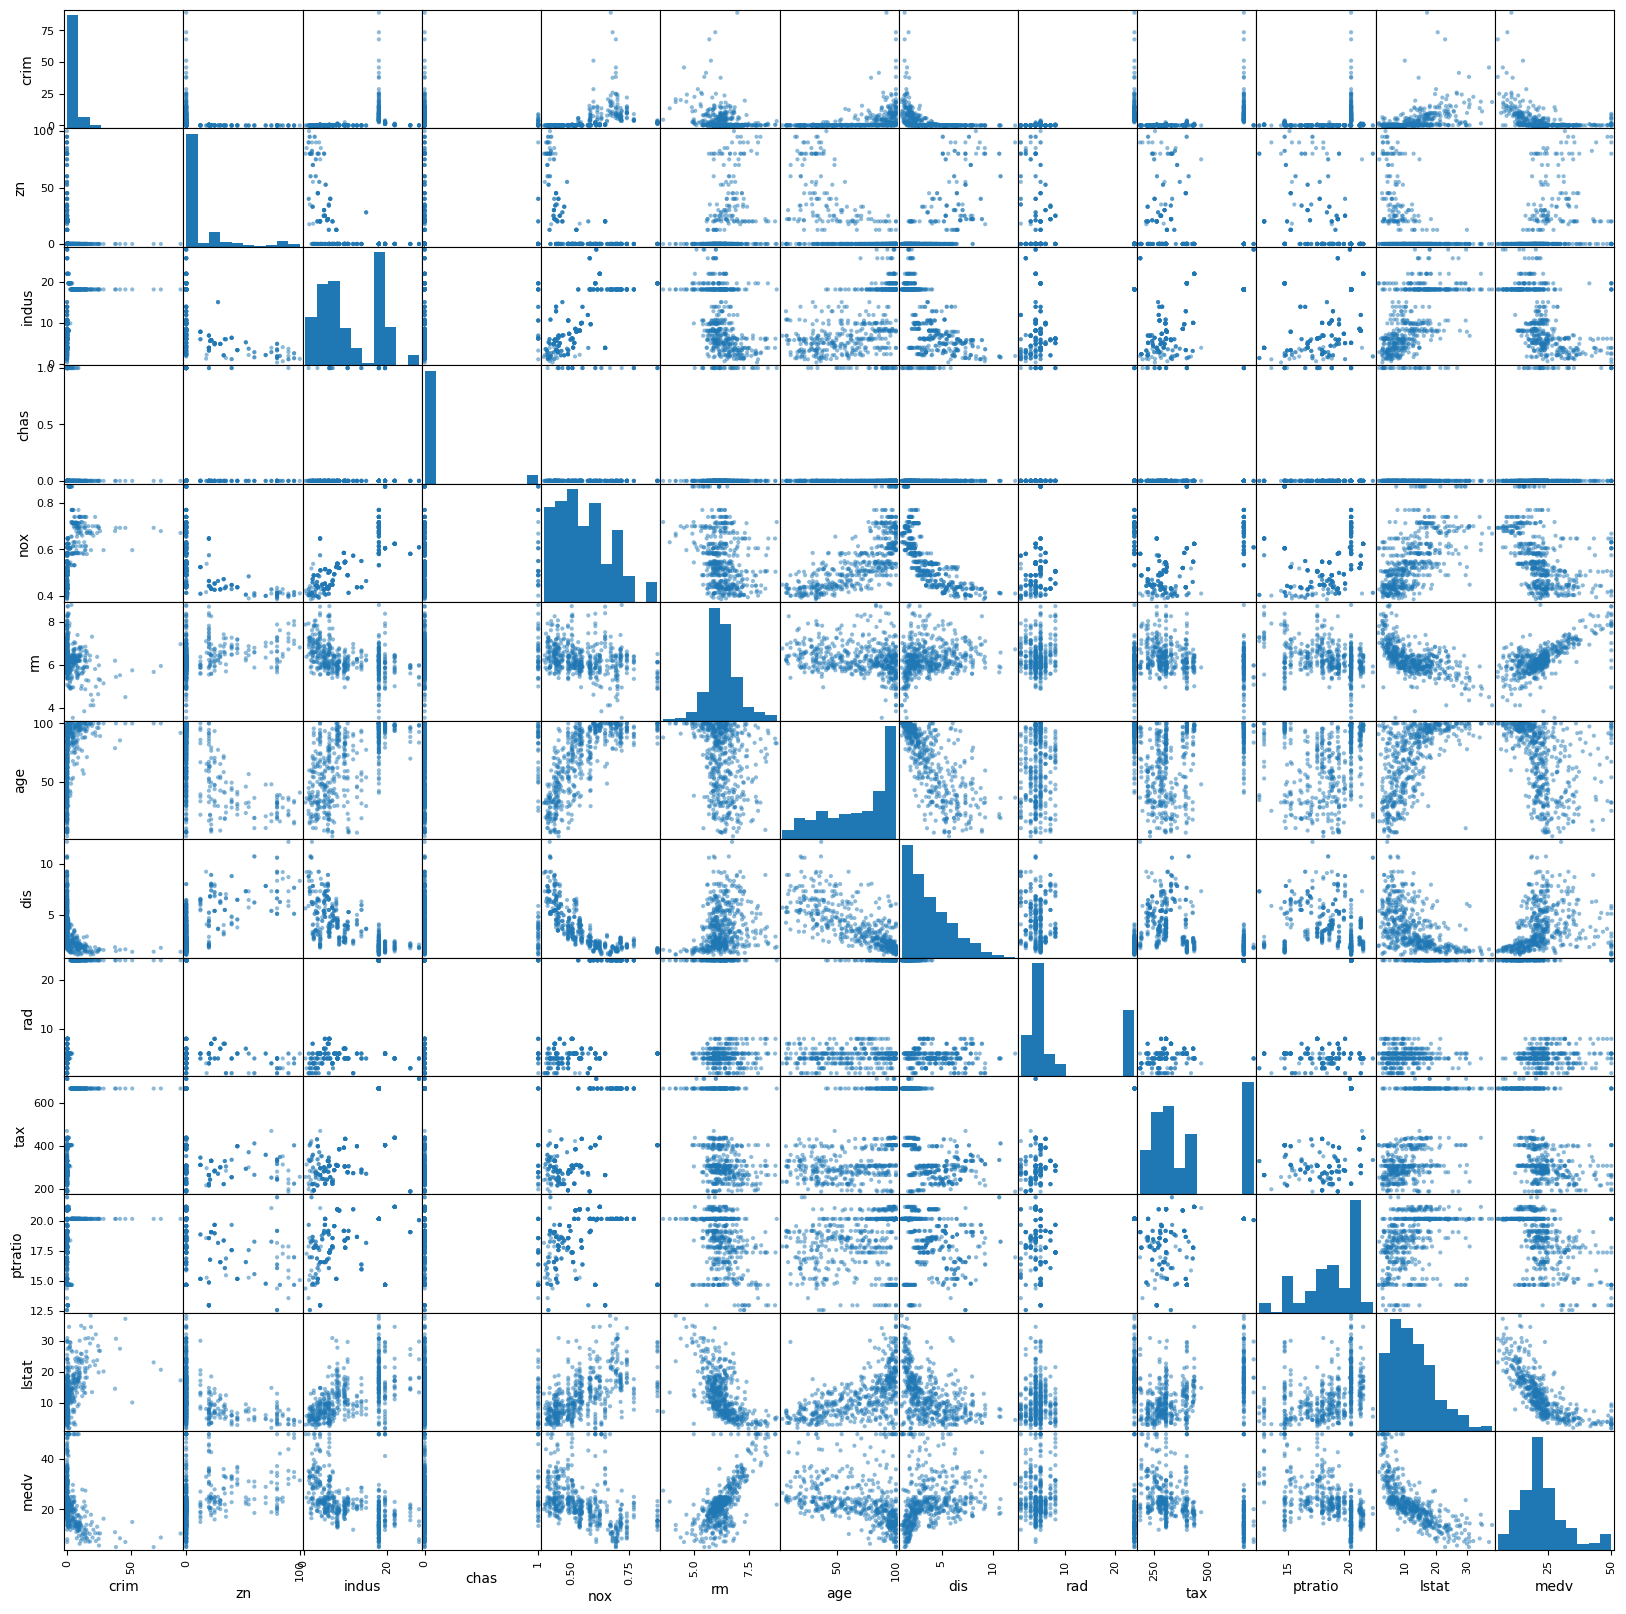

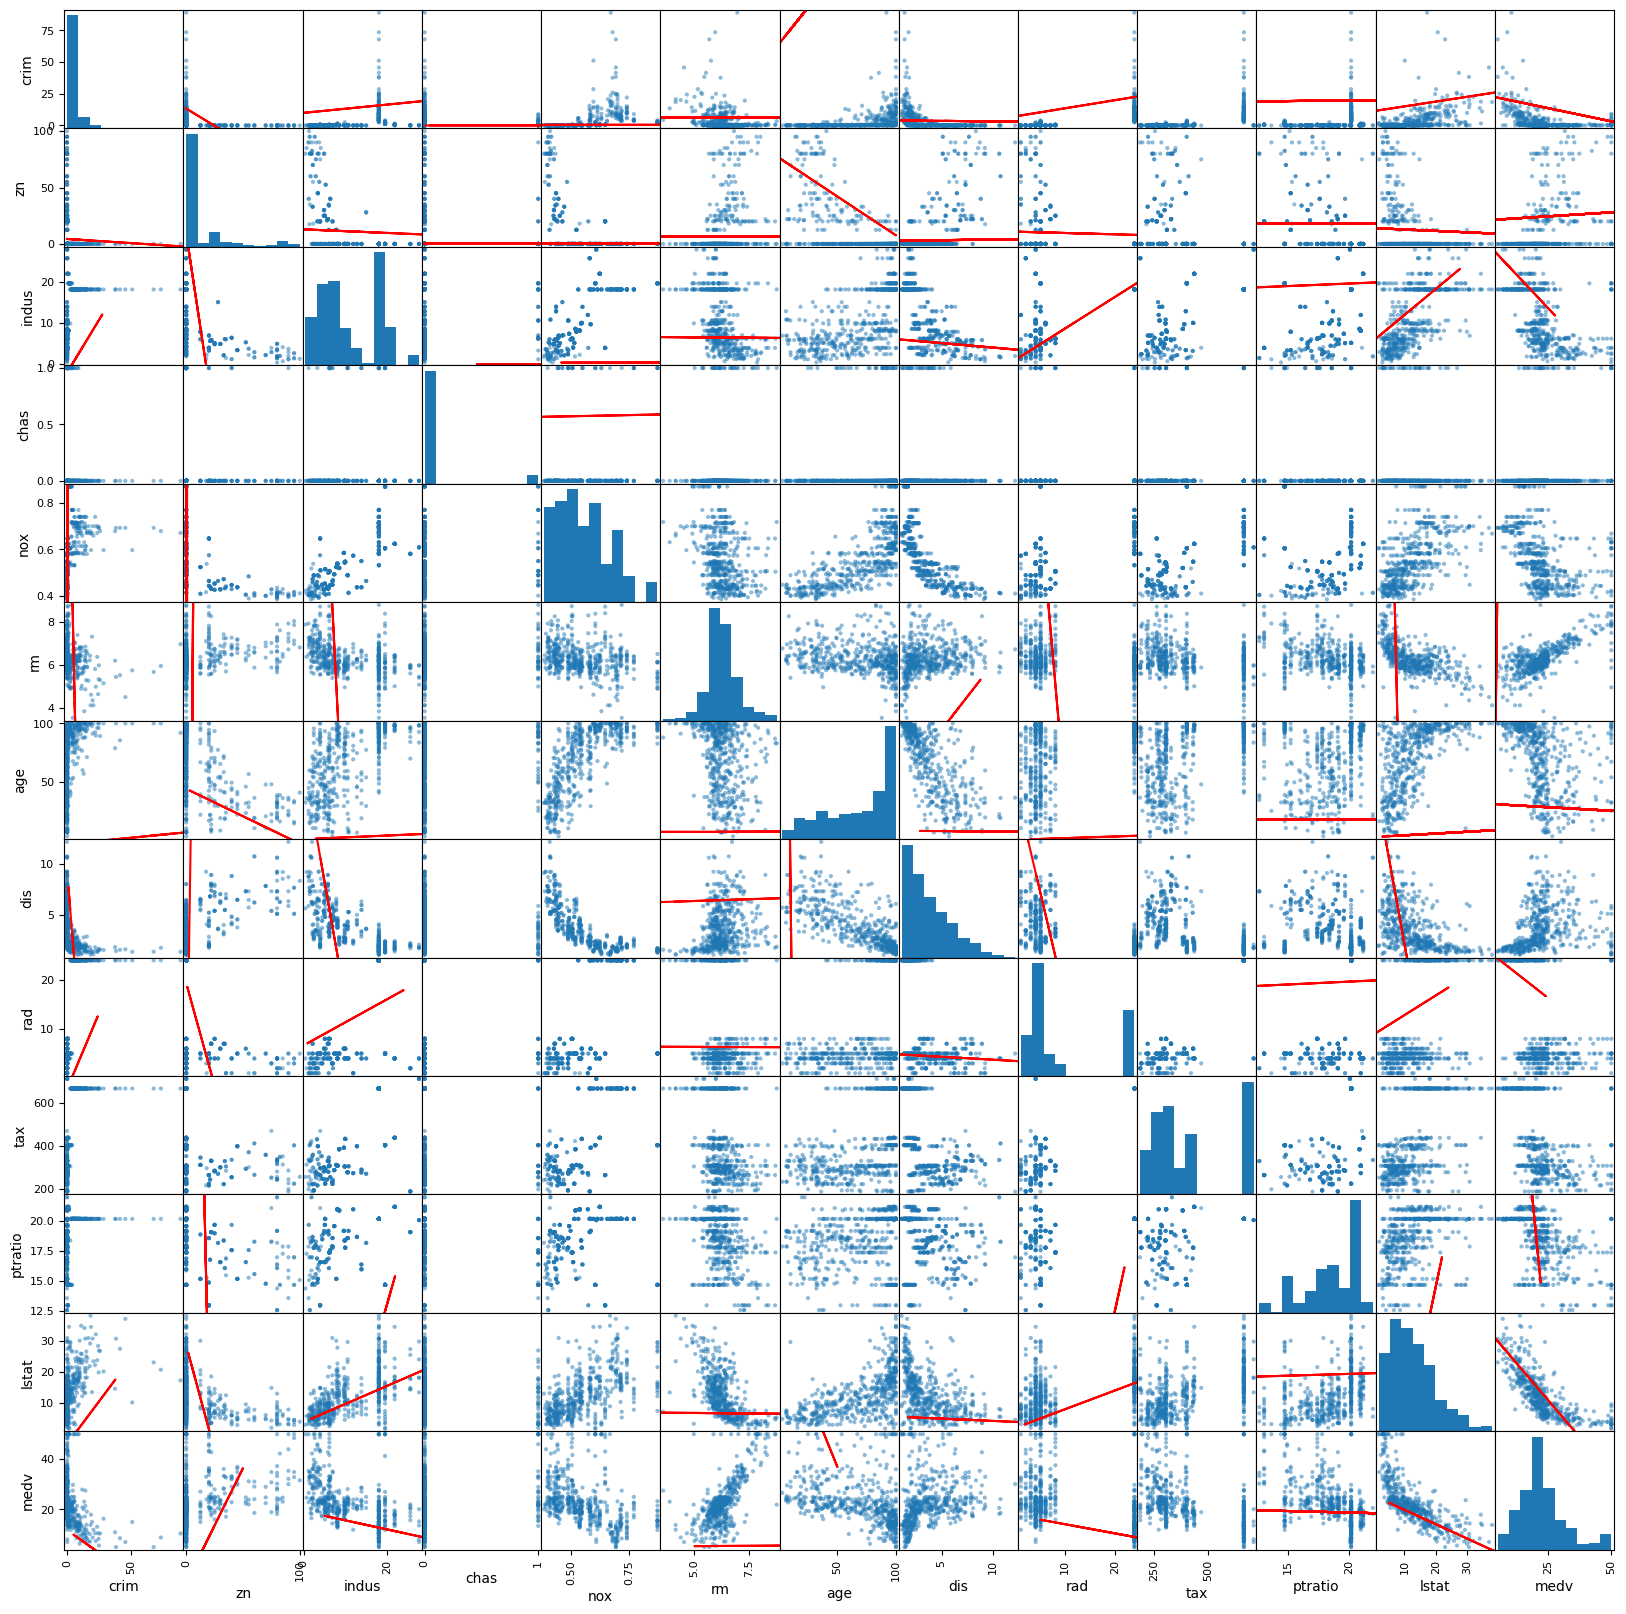

In [88]:
#brief

pd.plotting.scatter_matrix(boston, figsize=(20, 20), alpha=0.5)

# 畫 scatter matrix
fig, axes = plt.subplots(len(boston.columns), len(boston.columns), figsize=(20, 20))
sm = scatter_matrix(boston, alpha=0.5, ax=axes)

# 為每個散點圖加趨勢線
for i, x_col in enumerate(boston.columns):
    for j, y_col in enumerate(boston.columns):
        if i != j:
            ax = axes[i, j]
            x = boston[x_col]
            y = boston[y_col]
            m, b = np.polyfit(x, y, 1)
            ax.plot(x, m*x + b, color='red')


In [25]:
#detail

"""
cols = boston.columns
for i in range(len(cols)):
    for j in range(0, len(cols)):
        plt.figure()
        plt.scatter(boston[cols[i]], boston[cols[j]], alpha=0.5)
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.title(f'{cols[i]} vs {cols[j]}')
        plt.show()
"""

"\ncols = boston.columns\nfor i in range(len(cols)):\n    for j in range(0, len(cols)):\n        plt.figure()\n        plt.scatter(boston[cols[i]], boston[cols[j]], alpha=0.5)\n        plt.xlabel(cols[i])\n        plt.ylabel(cols[j])\n        plt.title(f'{cols[i]} vs {cols[j]}')\n        plt.show()\n"

The scatter plot matrix above illustrates whether the variables exhibit positive, negative, or no clear correlations.
Variables such as tax and rad or lstat and crim show positive relationships, while dis and nox as well as rm and lstat display negative associations. 
In contrast, chas does not exhibit any obvious correlation with other predictors. 
The red trend lines highlight these overall tendencies across the dataset.

(d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

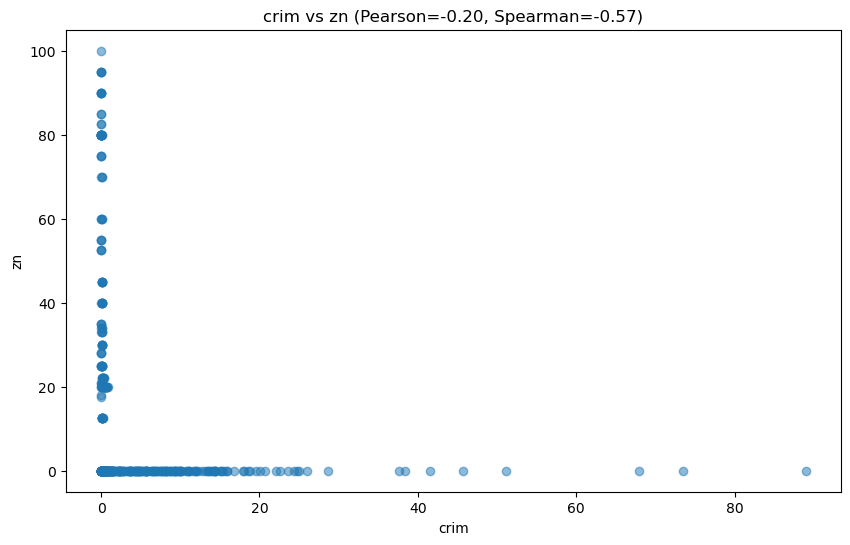

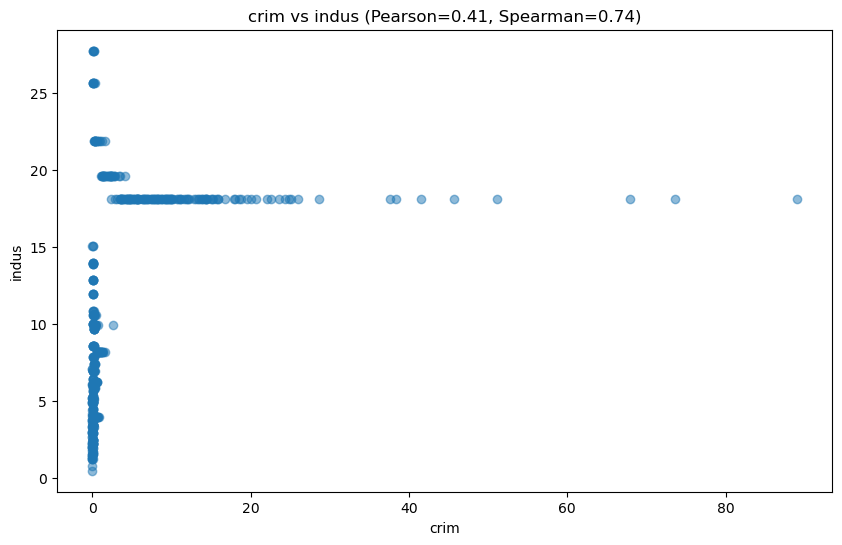

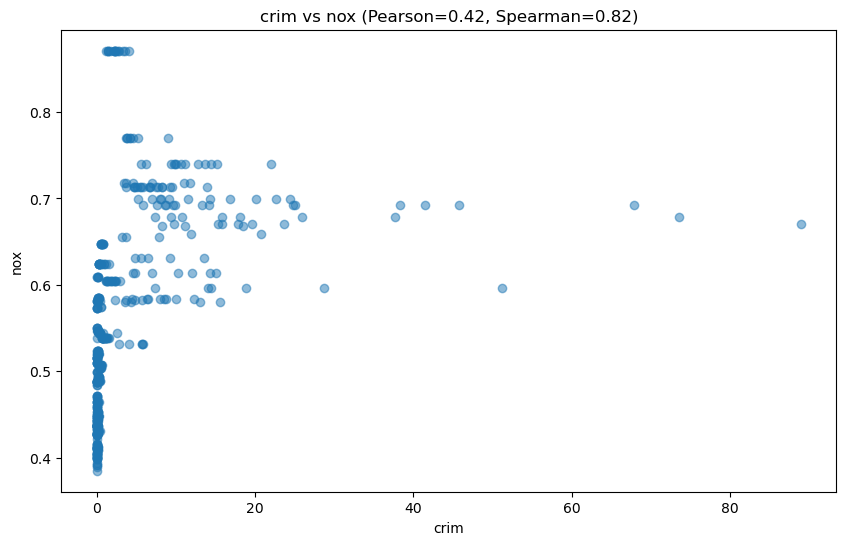

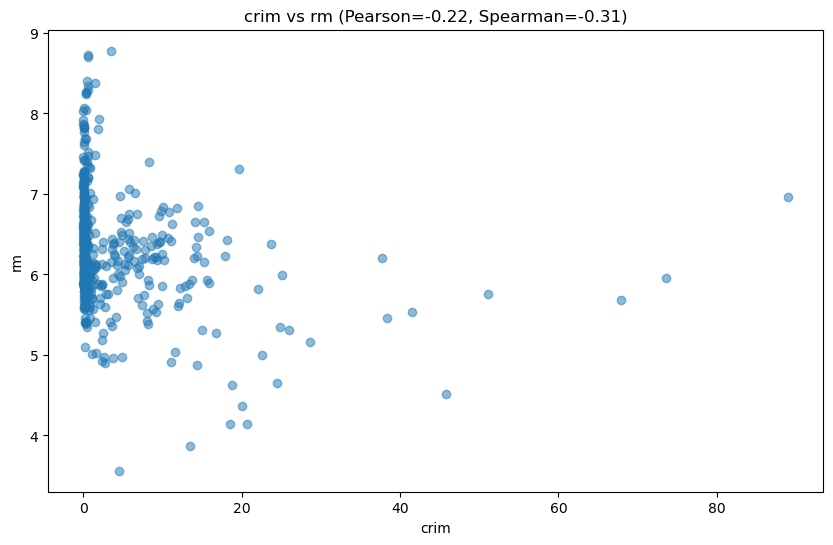

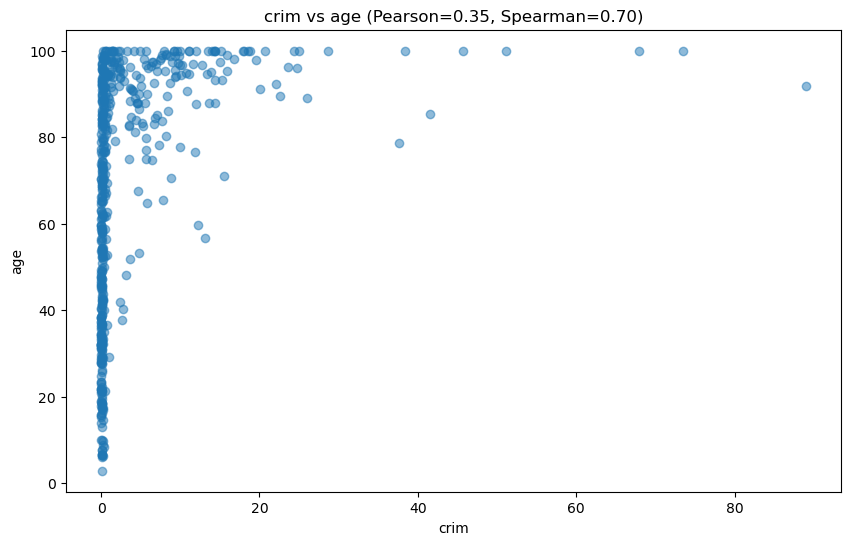

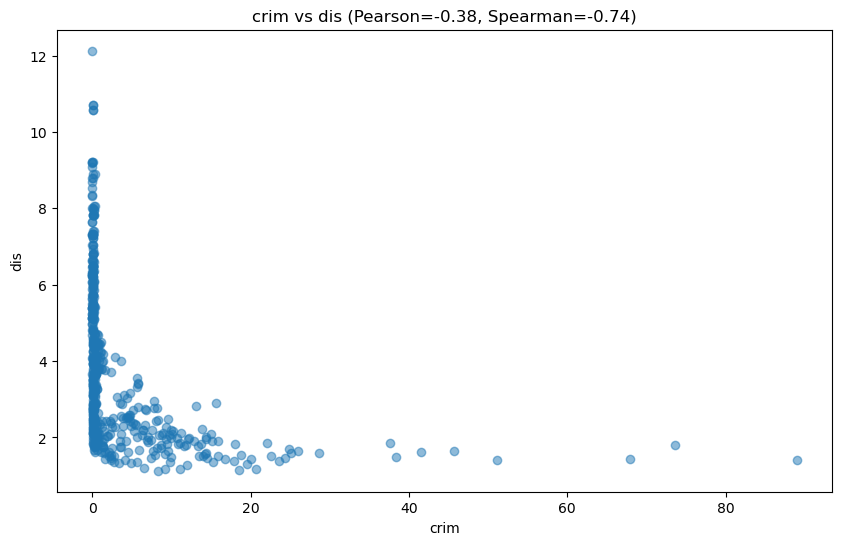

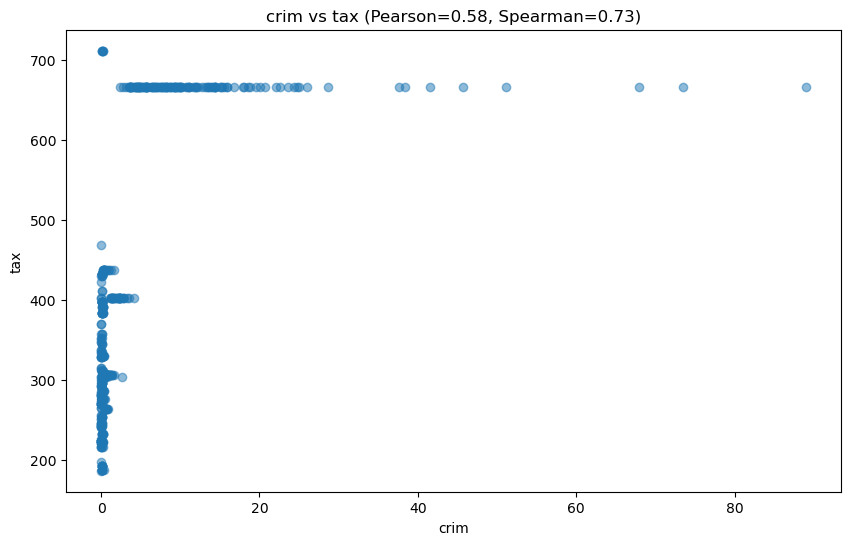

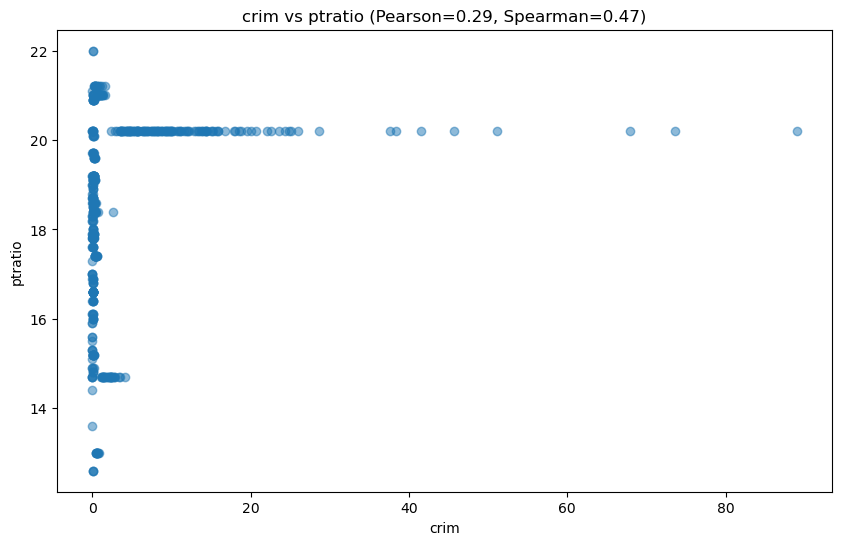

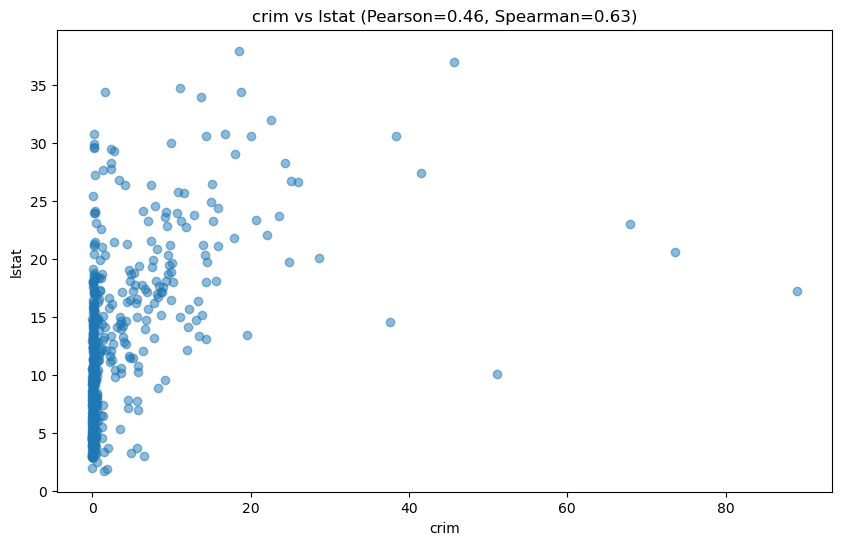

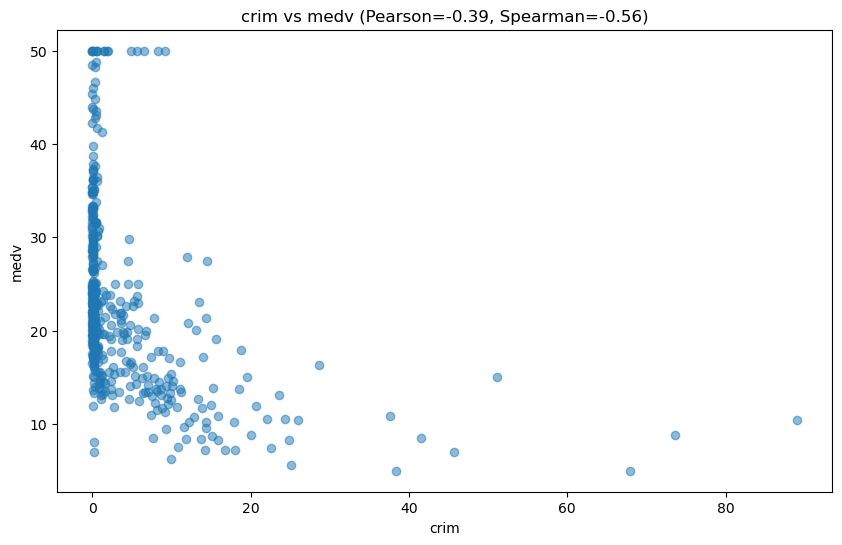

In [56]:
#continuous variable vs continuous variable

cols = boston.columns
for col_name in cols:
    if (col_name != 'crim') and (col_name != 'chas') and (col_name != 'rad'):
        plt.figure(figsize=(10, 6))
        x = boston['crim']
        y = boston[col_name]
        plt.scatter(x, y, alpha=0.5)
        pearson_corr = x.corr(y)
        spearman_corr = x.corr(y, method='spearman')
        plt.xlabel('crim')
        plt.ylabel(col_name)
        plt.title(f'crim vs {col_name} (Pearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f})')
        plt.show()

Based on the scatter plot and correlation analysis, there is a clear negative relationship between crim (per capita crime rate by town) and dis (weighted distances to five Boston employment centres).
The scatter plot visually demonstrates this inverse relationship: as the crime rate increases, the weighted distance to the five Boston employment centres tends to decrease. This suggests that suburbs closer to employment centres tend to have higher crime rates, while areas further away tend to have lower crime rates.
There is also a strong negative Spearman coefficient (-0.74) between crim and dis.

Based on the scatter plot and correlation analysis, crim (per capita crime rate by town) shows clear positive relationships with several variables. Specifically, indus (proportion of non-retail business acres per town), nox (nitric oxides concentration), age (proportion of owner-occupied units built prior to 1940), tax (full-value property-tax rate per $10,000), and lstat (percentage of lower-status population) are all positively associated with the crime rate. 
The scatter plots demonstrate these upward trends: as the crime rate increases, each of these variables also tends to rise. This pattern suggests that towns with higher levels of industrial land use, air pollution, older housing, heavier tax burdens, and larger proportions of lower-status residents generally experience higher crime rates. Supporting this observation, the Spearman coefficients indicate strong positive correlations, with values of 0.74 for indus, 0.82 for nox, 0.70 for age, 0.73 for tax, and 0.63 for lstat.

<Figure size 1000x600 with 0 Axes>

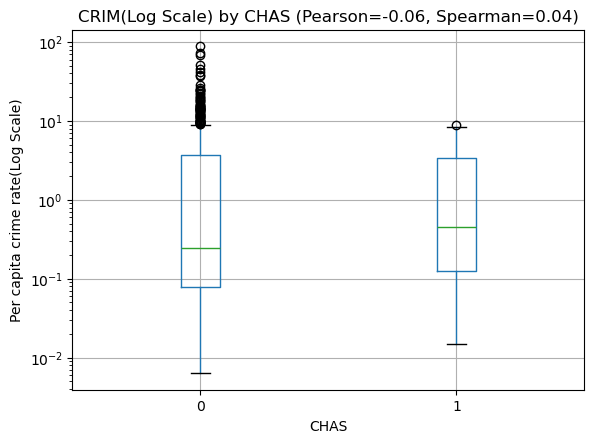

<Figure size 1000x600 with 0 Axes>

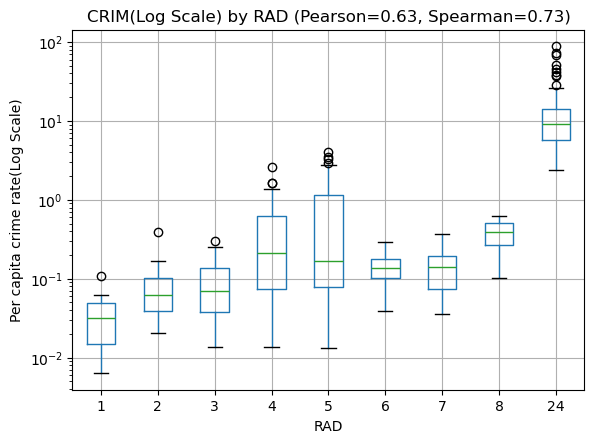

In [58]:
# uncontinuous variable vs continuous variable

plt.figure(figsize=(10, 6))
# CHAS 是類別型，計算 crim 與 chas 的相關係數
pearson_corr = boston['crim'].corr(boston['chas'])
spearman_corr = boston['crim'].corr(boston['chas'], method='spearman')
boston.boxplot(column='crim', by='chas')
plt.yscale('log')
plt.title(f'CRIM(Log Scale) by CHAS (Pearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f})')
plt.xlabel('CHAS')
plt.ylabel('Per capita crime rate(Log Scale)')
plt.suptitle("")
plt.show()

plt.figure(figsize=(10, 6))
# RAD 是類別型，計算 crim 與 rad 的相關係數
pearson_corr = boston['crim'].corr(boston['rad'])
spearman_corr = boston['crim'].corr(boston['rad'], method='spearman')
boston.boxplot(column='crim', by='rad')
plt.title(f'CRIM(Log Scale) by RAD (Pearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f})')
plt.yscale('log')
plt.xlabel('RAD')
plt.ylabel('Per capita crime rate(Log Scale)')
plt.suptitle("")
plt.show()

Based on the boxplot and correlation analysis, there is a clear positive relationship between crim (per capita crime rate) and RAD (index of accessibility to radial highways). 
The boxplot visually demonstrates this direct relationship: as the rad value increases, the median crime rate tends to rise, and so do the 25th and 75th percentiles. This means not only is the center of the crime rate distribution moving up, but the entire central body of the data is shifting as well. This is particularly evident with the final group, rad = 24, which has a significantly higher median crime rate than all other groups. Areas with low rad values (1-3) are almost exclusively found to have a very low crime rate, while areas with high rad values have substantially higher crime rates.

(e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

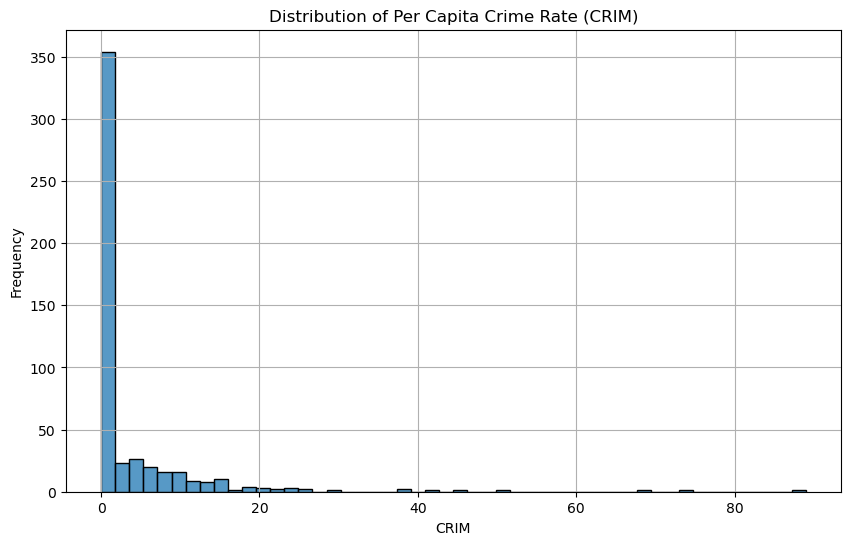

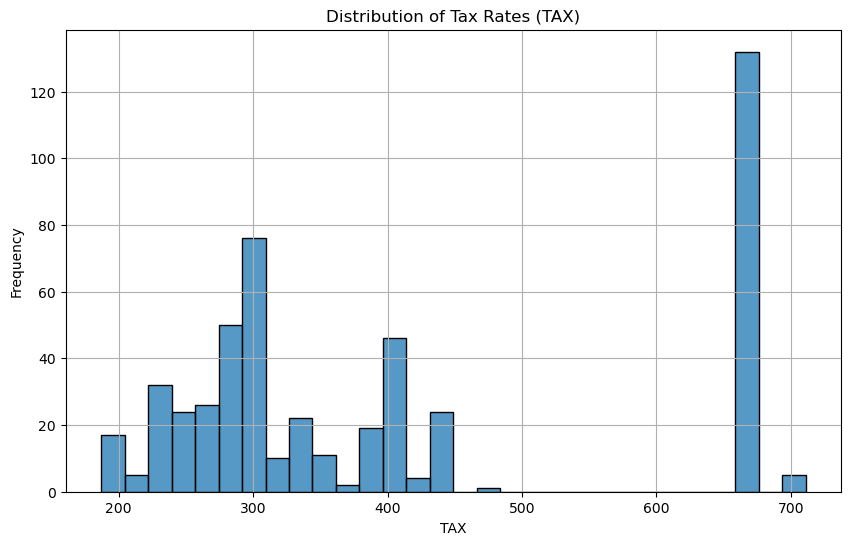

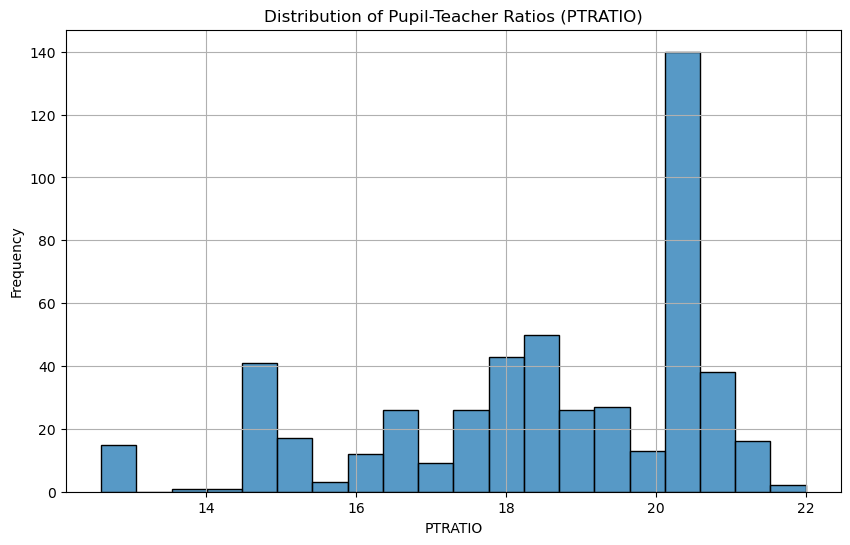

In [63]:
# 1. 繪製 CRIM 的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(boston['crim'], bins=50)
plt.title('Distribution of Per Capita Crime Rate (CRIM)')
plt.xlabel('CRIM')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. 繪製 TAX 的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(boston['tax'], bins=30)
plt.title('Distribution of Tax Rates (TAX)')
plt.xlabel('TAX')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. 繪製 PTRATIO 的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(boston['ptratio'], bins=20)
plt.title('Distribution of Pupil-Teacher Ratios (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [83]:
condition = boston['crim'] > 80
count = condition.sum()
overall_stats = boston.describe().transpose()
print(f"Number of rows where 'crim' is greater than 80: {count},  Overall Range: [{overall_stats.loc['crim', 'min']:.2f} - {overall_stats.loc['crim', 'max']:.2f}]")

condition = boston['tax'] > 600
count = condition.sum()
print(f"Number of rows where 'tax' is greater than 600: {count},  Overall Range: [{overall_stats.loc['tax', 'min']:.2f} - {overall_stats.loc['tax', 'max']:.2f}]")

condition = boston['ptratio'] > 20
count = condition.sum()
print(f"Number of rows where 'ptratio' is greater than 20: {count},  Overall Range: [{overall_stats.loc['ptratio', 'min']:.2f} - {overall_stats.loc['ptratio', 'max']:.2f}]")

Number of rows where 'crim' is greater than 80: 1,  Overall Range: [0.01 - 88.98]
Number of rows where 'tax' is greater than 600: 137,  Overall Range: [187.00 - 711.00]
Number of rows where 'ptratio' is greater than 20: 201,  Overall Range: [12.60 - 22.00]


(f) How many of the suburbs in this data set bound the Charles river?

In [76]:
count = 0
columns = boston['chas']
for i in range(506):
    if columns[i] == 1:
        count += 1
print(f"Number of the suburbs in this data set bound the Charles river = {count}")

Number of the suburbs in this data set bound the Charles river = 35


(g) What is the median pupil-teacher ratio among the towns in this data set?

In [59]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


base on the chart above, the median pupil-teacher ratio among the towns in this data set = 19.050000

(h) Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [77]:
# --- 步驟 1: 找到 medv 最低的城鎮 ---
# 使用 idxmin() 函式找到 medv 欄位中最小值對應的索引
lowest_medv_idx = boston['medv'].idxmin()

# 根據索引提取該筆資料
lowest_medv_suburb = boston.loc[lowest_medv_idx]

print("--- Suburb with the Lowest Median Home Value ---")
print(lowest_medv_suburb)

# --- 步驟 2: 提取該城鎮的所有預測變數值 (已在上面完成) ---
# `lowest_medv_suburb` 就是一個 Series，包含了所有預測變數的值

# --- 步驟 3: 比較與評論 ---
print("\n--- Comparison of Predictor Values ---")

# 計算整個數據集每個欄位的平均數、最大值和最小值
# 使用 .describe() 方法可以快速得到這些統計量
overall_stats = boston.describe().transpose()

# 針對每個預測變數進行比較
for predictor in boston.columns:
    if predictor != 'medv':
        suburb_value = lowest_medv_suburb[predictor]
        overall_min = overall_stats.loc[predictor, 'min']
        overall_mean = overall_stats.loc[predictor, 'mean']
        overall_max = overall_stats.loc[predictor, 'max']
        
        print(f"\n- Predictor: {predictor}")
        print(f"  Suburb Value: {suburb_value:.2f}")
        print(f"  Overall Range: [{overall_min:.2f} - {overall_max:.2f}] (Mean: {overall_mean:.2f})")
        
        # 進行簡單的比較評論
        if suburb_value > overall_mean:
            comparison = "much higher than" if suburb_value > overall_max else "higher than"
        elif suburb_value < overall_mean:
            comparison = "much lower than" if suburb_value < overall_min else "lower than"
        else:
            comparison = "about the same as"

        print(f"  Comparison: The value is {comparison} the overall mean.")

--- Suburb with the Lowest Median Home Value ---
crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

--- Comparison of Predictor Values ---

- Predictor: crim
  Suburb Value: 38.35
  Overall Range: [0.01 - 88.98] (Mean: 3.61)
  Comparison: The value is higher than the overall mean.

- Predictor: zn
  Suburb Value: 0.00
  Overall Range: [0.00 - 100.00] (Mean: 11.36)
  Comparison: The value is lower than the overall mean.

- Predictor: indus
  Suburb Value: 18.10
  Overall Range: [0.46 - 27.74] (Mean: 11.14)
  Comparison: The value is higher than the overall mean.

- Predictor: chas
  Suburb Value: 0.00
  Overall Range: [0.00 - 1.00] (Mean: 0.07)
  Comparison: The value is lower than the overall mean.

- Predictor: nox
  Suburb Value: 0.69
  Overall Range: 

(i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [84]:
condition = boston['rm'] > 7
count = condition.sum()
print(f"Number of suburbs where 'average more than seven rooms per dwelling: {count}")

condition = boston['rm'] > 8
count = condition.sum()
print(f"Number of suburbs where 'average more than seven rooms per dwelling: {count}")

if count > 0:
    high_room_suburbs = boston.loc[condition]
    overall_stats = boston.describe().transpose()

    print("\n--- Values for Suburbs with > 8 Rooms ---")
    print(high_room_suburbs)

    print("\n--- Comparison to Overall Dataset ---")
    for predictor in high_room_suburbs.columns:
        suburb_values = high_room_suburbs[predictor]
        overall_mean = overall_stats.loc[predictor, 'mean']
        
        print(f"\n- Predictor: {predictor}")
        print(f"  Values for >8 rooms: Mean={suburb_values.mean():.2f}, Min={suburb_values.min():.2f}, Max={suburb_values.max():.2f}")
        print(f"  Overall Mean: {overall_mean:.2f}")


Number of suburbs where 'average more than seven rooms per dwelling: 64
Number of suburbs where 'average more than seven rooms per dwelling: 13

--- Values for Suburbs with > 8 Rooms ---
        crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
97   0.12083   0.0   2.89     0  0.4450  8.069  76.0  3.4952    2  276   
163  1.51902   0.0  19.58     1  0.6050  8.375  93.9  2.1620    5  403   
204  0.02009  95.0   2.68     0  0.4161  8.034  31.9  5.1180    4  224   
224  0.31533   0.0   6.20     0  0.5040  8.266  78.3  2.8944    8  307   
225  0.52693   0.0   6.20     0  0.5040  8.725  83.0  2.8944    8  307   
226  0.38214   0.0   6.20     0  0.5040  8.040  86.5  3.2157    8  307   
232  0.57529   0.0   6.20     0  0.5070  8.337  73.3  3.8384    8  307   
233  0.33147   0.0   6.20     0  0.5070  8.247  70.4  3.6519    8  307   
253  0.36894  22.0   5.86     0  0.4310  8.259   8.4  8.9067    7  330   
257  0.61154  20.0   3.97     0  0.6470  8.704  86.9  1.8010    5  264   